# Which is the Best Neighbirdhood?

## By Ann Wang (anw152@pitt.edu), Aakash Arvapalli (aaa240@pitt.edu), and Kyle Harwick (KCH45@pitt.edu)

### Introduction

When we set out on deciding what to choose as our metric for what is the best neighborhood in the great City of Pittsburgh, we wanted to pick something that no one had done before and something that would be fun. Choosing the best neighborhood for humans would be too easy, too overdone, since the clear correct answer would be beautiful and clean South Oakland. Choosing the best neighborhood for a bird, however, would be much more interesting, since their standards of living much differ from ours. Birds could (hypothetically) greatly benefit from our findings to quickly and efficiently find the best place to stay in PGH. Therefore, we pose the question: Which is the Best Neighbirdhood?


### Overall Metric: The best place for a bird to live in Pittsburgh

We decided to measure this in three primary ways: number of Water Features (what bird doesn't love a good swim?), number of trees (they need a tree to live in of course), and the number (or lack there of) of fires.

Data sets utilized for this project:

1. [City of Pittsburgh Water Features](https://data.wprdc.org/dataset/city-water-features)

   Water fountains, spray fountains and other assets which provide water for public use.
   
2. [City of Pittsburgh Trees](https://data.wprdc.org/dataset/city-trees)

    Trees cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division.

3. [Fire Incidents in City of Pittsburgh](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh)

    Incidents of fire responded to by the Pittsburgh Bureau of Fire.

4. [Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

    Pittsburgh Neighborhoods

### Submetric 1: Water Features

#### Kyle Harwick

Let's start by loading in pandas/geopandas and the Pittsburgh neighborhood geoJSON file, and double check that it was properly loaded.

In [1]:
import pandas as pd
import geopandas as gpd

neighborhoods_geo = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson")

neighborhoods_geo.head(3)


OBJECTID  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0         1         233        42        003    140500          3   
1         2         203        42        003    140100          3   
2         3          86        42        003    101700          2   

        geoid10     namelsad10 mtfcc10 funcstat10  ...  created_user  \
0  420031405003  Block Group 3   G5030          S  ...           SDE   
1  420031401003  Block Group 3   G5030          S  ...           SDE   
2  420031017002  Block Group 2   G5030          S  ...           SDE   

          created_date last_edited_user     last_edited_date  temp  \
0  2020-08-14T12:57:28              SDE  2020-08-14T13:02:13  None   
1  2020-08-14T12:57:28              SDE  2020-08-14T13:02:41  None   
2  2020-08-14T12:57:28              SDE  2020-08-14T12:59:55  None   

   pghdb_sde_Neighborhood_2010_are                              GlobalID  \
0                        7968760.0  a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0   
1                       34078712.0  20d4605b-258e-441a-a57e-a28fdabb6d30   
2                       12751163.0  bf4065e7-c29c-48bd-b529-e7fd99077238   

    Shape__Area  Shape__Length  \
0  8.153647e+06   14047.065024   
1  3.407739e+07   30347.886823   
2  1.275116e+07   14577.441571   

                                            geometry  
0  POLYGON ((-79.90560 40.45522, -79.90553 40.455...  
1  POLYGON ((-79.91309 40.43804, -79.91321 40.438...  
2  POLYGON ((-79.93457 40.47217, -79.93455 40.472...  

[3 rows x 40 columns]

Now we will also load in the water features geoJSON file, and double check that that was inputted correctly.

In [2]:
wf_geo = gpd.read_file("https://data.wprdc.org/dataset/fe7cfb11-9f33-4590-a5ee-04419f3f974a/resource/f7c252a5-28be-43ab-95b5-f3eb0f1eef67/download/wf_img.geojson")

wf_geo.head(3)

name control_type       feature_type              make  \
0           Able Long Park   Continuous  Drinking Fountain  Regular Fountain   
1  Albert Turk Graham Park       On/Off  Drinking Fountain   Most Dependable   
2        Allegheny Commons       On/Off  Drinking Fountain   Most Dependable   

           id                                              image  \
0  1816791851  https://tools.wprdc.org/images/pittsburgh/wate...   
1  1599892422  https://tools.wprdc.org/images/pittsburgh/wate...   
2   768100943                                                      

                                        geometry  
0  POINT Z (-80.02833 40.40844 1816791851.00000)  
1  POINT Z (-79.98406 40.44045 1599892422.00000)  
2   POINT Z (-80.00306 40.45570 768100943.00000)

Now let's create a data frame to better digest the information we need, as well as to better utilize later. We will be adding "Feature_Count" and "Rank", which will come into play later. Once again we will display the first three to double check that everything is in order.

In [3]:
locations = pd.DataFrame(columns = ["Neighborhoods","Geometry","Feature_Count"])
locations["Neighborhoods"] = neighborhoods_geo["hood"]
locations["Geometry"] = neighborhoods_geo["geometry"]
locations["Feature_Count"] = 0
locations["Rank"] = 0

locations.head(3)

Neighborhoods                                           Geometry  \
0   Point Breeze North  POLYGON ((-79.90560 40.45522, -79.90553 40.455...   
1  Squirrel Hill North  POLYGON ((-79.91309 40.43804, -79.91321 40.438...   
2             Garfield  POLYGON ((-79.93457 40.47217, -79.93455 40.472...   

   Feature_Count  Rank  
0              0     0  
1              0     0  
2              0     0

Now we will iterate through both the Neighborhood and Water Features geographic data. We will create points for each data point of the Water Features, and search through each Neighborhood's shape data to see if they are within, thus adding one to the Feature_Count column for that Neighborhood.

In [4]:
from shapely.geometry import Point

for i, feature in wf_geo.iterrows():
    point = Point(feature["geometry"])
    for j, location in locations.iterrows():
        if location["Geometry"].contains(point):
            locations.at[j,"Feature_Count"] = location["Feature_Count"] + 1
            break
locations.head(3)

Neighborhoods                                           Geometry  \
0   Point Breeze North  POLYGON ((-79.90560 40.45522, -79.90553 40.455...   
1  Squirrel Hill North  POLYGON ((-79.91309 40.43804, -79.91321 40.438...   
2             Garfield  POLYGON ((-79.93457 40.47217, -79.93455 40.472...   

   Feature_Count  Rank  
0              1     0  
1              1     0  
2              3     0

Now we will sort in a descending way, and assign chronologically a rank to each Neighborhood, with 1 being the best.

In [5]:
amounts_sorted = locations.sort_values("Feature_Count", ascending=False)
rank = 1
    
for f, sort in amounts_sorted.iterrows():
        amounts_sorted.at[f,"Rank"] = rank
        rank = rank + 1
    
amounts_sorted.head(10)
    

Neighborhoods                                           Geometry  \
80  Squirrel Hill South  POLYGON ((-79.94475 40.44101, -79.94405 40.440...   
36        Highland Park  POLYGON ((-79.91356 40.48644, -79.91354 40.486...   
24            Brookline  POLYGON ((-80.00172 40.40193, -80.00171 40.401...   
45     Allegheny Center  POLYGON ((-80.00120 40.45035, -80.00132 40.450...   
15          Perry North  POLYGON ((-80.01903 40.49754, -80.01788 40.497...   
54     Mount Washington  POLYGON ((-79.99927 40.42915, -79.99927 40.429...   
87              Elliott  POLYGON ((-80.02795 40.44463, -80.02806 40.444...   
86      Terrace Village  POLYGON ((-79.95848 40.44846, -79.95849 40.448...   
51              Carrick  POLYGON ((-79.99194 40.40719, -79.99191 40.407...   
11         East Liberty  POLYGON ((-79.91580 40.46081, -79.91577 40.460...   

    Feature_Count  Rank  
80             14     1  
36             12     2  
24              8     3  
45              7     4  
15              7     5  
54              6     6  
87              6     7  
86              6     8  
51              6     9  
11              6    10

Finally, I will visualize the data we have just collected. The first is a bar graph, which shows the spread of the 25 Neighborhoods with the highest Feature_Counts. Furthermore, for aesthetic purposes, I also decided to plot these Neighborhoods on a map, which is seen at the bottom.

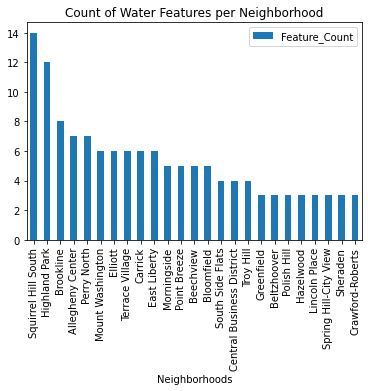

In [6]:
plot = amounts_sorted.iloc[:25].plot(kind='bar',x="Neighborhoods",y="Feature_Count",title="Count of Water Features per Neighborhood")


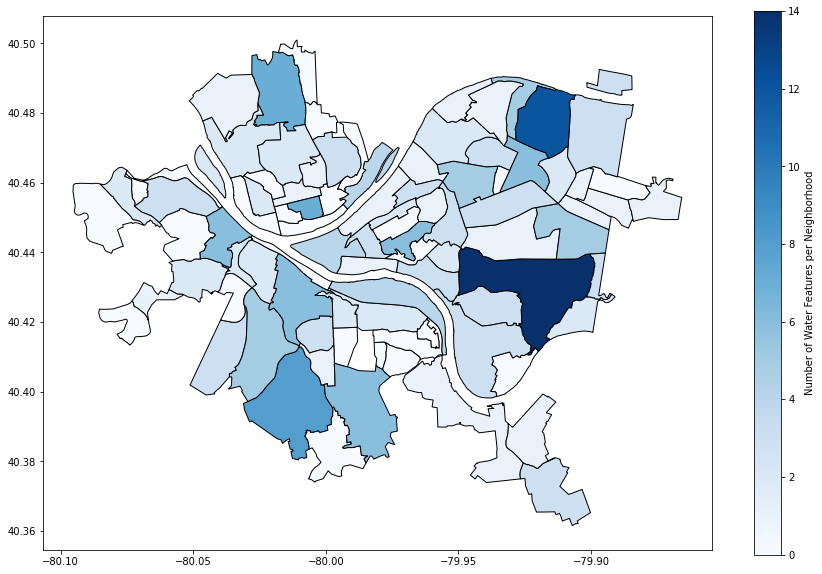

In [7]:
neighborhoods_geo["Features"] = locations["Feature_Count"]

neighborhoods_geo.plot(column="Features", cmap = 'Blues', edgecolor='black', legend=True, legend_kwds = {'label': "Number of Water Features per Neighborhood"}, figsize=(15,10))

### Conclusion

Ult